# Dataset

In [106]:
import pandas as pd

resultados_exames = pd.read_csv("data-set/exames.csv")
resultados_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [107]:
resultados_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           569 non-null    int64  
 1   diagnostico  569 non-null    object 
 2   exame_1      569 non-null    float64
 3   exame_2      569 non-null    float64
 4   exame_3      569 non-null    float64
 5   exame_4      569 non-null    float64
 6   exame_5      569 non-null    float64
 7   exame_6      569 non-null    float64
 8   exame_7      569 non-null    float64
 9   exame_8      569 non-null    float64
 10  exame_9      569 non-null    float64
 11  exame_10     569 non-null    float64
 12  exame_11     569 non-null    float64
 13  exame_12     569 non-null    float64
 14  exame_13     569 non-null    float64
 15  exame_14     569 non-null    float64
 16  exame_15     569 non-null    float64
 17  exame_16     569 non-null    float64
 18  exame_17     569 non-null    float64
 19  exame_18

In [108]:
resultados_exames.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [109]:
n_entradas = resultados_exames.shape[0]
n_nulos = resultados_exames.isnull().sum().sum()
percentual_nulos = (n_nulos / n_entradas) * 100
print(f"Percentual de nulos: {percentual_nulos:.2f}%")

Percentual de nulos: 73.64%


**Visto que o percentual de nulos é consideravelmente grande e concentrado em uma única variável, optará-se por remover completamente a variável.**

In [110]:
resultados_exames.drop(columns="exame_33", inplace=True)

# Treino e Teste

## Algoritmo: RandomForest

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import random

SEED = 123143
random.seed(SEED)

valores_exames = resultados_exames.drop(columns=["id", "diagnostico"])
diagnostico = resultados_exames.diagnostico

treino_x, teste_x, treino_y, teste_y = train_test_split(
    valores_exames, diagnostico, test_size=0.3
)

classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(treino_x, treino_y)
acuracia_classificador = classificador.score(teste_x, teste_y) * 100
print(f"Resultado da classificação: {acuracia_classificador:.2f}%")

Resultado da classificação: 92.40%


## DummyClassifier

In [112]:
from sklearn.dummy import DummyClassifier

SEED = 123143
random.seed(SEED)

classificador_bobo = DummyClassifier(strategy="most_frequent")
classificador_bobo.fit(treino_x, treino_y)
acuracia_classificador_bobo = classificador_bobo.score(teste_x, teste_y) * 100
print(f"Resultado do classificador bobo: {acuracia_classificador_bobo:.2f}%")

Resultado do classificador bobo: 66.67%


# Avaliando os exames

In [113]:
import plotly.express as px
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames)
valores_exames_padronizados = padronizador.transform(valores_exames)
valores_exames_padronizados = pd.DataFrame(
    valores_exames_padronizados, columns=valores_exames.columns
)

dados_plot = pd.concat([diagnostico, valores_exames_padronizados], axis=1)
dados_plot_melted = pd.melt(
    dados_plot, id_vars="diagnostico", var_name="exames", value_name="valores"
)

# Create the violin plot
fig = px.violin(
    dados_plot_melted,
    y="valores",
    box=True,
    points=False,
    color="diagnostico",
    orientation="v",
    violinmode="group",
    animation_frame="exames",
    title="Distribuição dos valores dos exames por diagnóstico"
)
fig.show()

In [114]:
def plot_violin(diagnostico, valores_exames_padronizados, inicio, fim):
    dados_plot_filtered = pd.concat([diagnostico, valores_exames_padronizados.iloc[:, inicio:fim]], axis=1)
    fig = px.violin(
        dados_plot_filtered,
        box=True,
        points=False,
        color="diagnostico",
        orientation="v",
        violinmode="overlay",
        title="Distribuição dos valores dos exames por diagnóstico"
    )
    fig.show()

plot_violin(diagnostico, valores_exames_padronizados, 0, 10)

In [115]:
plot_violin(diagnostico, valores_exames_padronizados, 10, 20)

In [116]:
plot_violin(diagnostico, valores_exames_padronizados, 20, 32)

In [117]:
valores_exames_v2 = valores_exames.drop(columns=["exame_29", "exame_4"])

def classificar(valores):
    SEED = 123143
    random.seed(SEED)

    treino_x, teste_x, treino_y, teste_y = train_test_split(
        valores, diagnostico, test_size=0.3
    )

    classificador = RandomForestClassifier(n_estimators=100)
    classificador.fit(treino_x, treino_y)
    return classificador.score(teste_x, teste_y) * 100
    
acuracia_classificador_v2 = classificar(valores_exames_v2)
print(f"Resultado da classificação: {acuracia_classificador_v2:.2f}%")

Resultado da classificação: 91.81%


In [118]:
matriz_correlacao = valores_exames_v2.corr()
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
                   z=matriz_correlacao.values,
                   x=matriz_correlacao.columns,
                   y=matriz_correlacao.index,
                   colorscale='Viridis'))

fig.update_layout(title="Matriz de correlação dos exames", width=1300, height=700)

fig.show()


In [119]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao > 0.99]
matriz_correlacao_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
variaveis_correlacionadas = matriz_correlacao_v1.sum()
variaveis_correlacionadas

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [121]:
variaveis_correlacionadas = variaveis_correlacionadas[variaveis_correlacionadas > 1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [122]:
valores_exames_v3 = valores_exames_v2.drop(columns=["exame_3", "exame_24"])

In [123]:
valores_exames_v3

,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,17.99,10.38,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,...,0.006193,25.380,17.33,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,...,0.003532,24.990,23.41,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,...,0.004571,23.570,25.53,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,...,0.009208,14.910,26.50,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,...,0.005115,22.540,16.67,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,...,0.004239,25.450,26.40,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,...,0.002498,23.690,38.25,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,...,0.003892,18.980,34.12,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,...,0.006185,25.740,39.42,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [124]:
acuracia_classificador_v3 = classificar(valores_exames_v3)
print(f"Resultado da classificação: {acuracia_classificador_v3:.2f}%")

Resultado da classificação: 92.98%


# Implementando SelectKBest

In [125]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selecionar_kmelhores = SelectKBest(chi2, k=5)

# Tratar os dados para utilizar os valores não normalizados
valores_exames_tratados = resultados_exames.drop(columns=["id", "diagnostico", "exame_3", "exame_24", "exame_29", "exame_4"])

treino_x, teste_x, treino_y, teste_y = train_test_split(
    valores_exames_tratados, diagnostico, test_size=0.3
)

selecionar_kmelhores.fit(treino_x, treino_y)
treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

In [126]:
teste_kbest.shape

(171, 5)

In [131]:
def classificar(treino_x, teste_x, treino_y, teste_y):
    SEED = 123143
    random.seed(SEED)

    classificador = RandomForestClassifier(n_estimators=100)
    classificador.fit(treino_x, treino_y)
    return classificador.score(teste_x, teste_y) * 100

acuracia_classificador_kbest = classificar(treino_kbest, teste_kbest, treino_y, teste_y)
print(f"Resultado da classificação: {acuracia_classificador_kbest:.2f}%")

Resultado da classificação: 90.64%


In [141]:
classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_kbest, treino_y)
print(
    "Resultado da classificação %.2f%%"
    % (classificador.score(teste_kbest, teste_y) * 100)
)

Resultado da classificação 92.40%


In [143]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_kbest))

[Text(56.5, 0.5, 'Real'), Text(0.5, 38.5, 'Predição')]

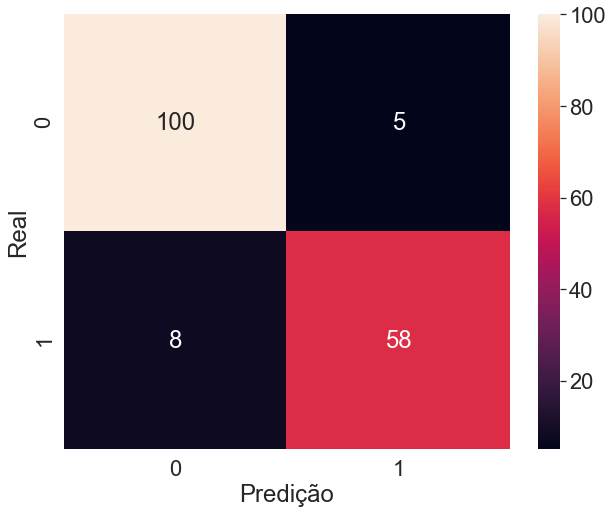

In [147]:
plt.figure(figsize=(10, 8))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao, annot=True, fmt="d").set(xlabel="Predição", ylabel="Real")

Resultado da classificação 90.06%


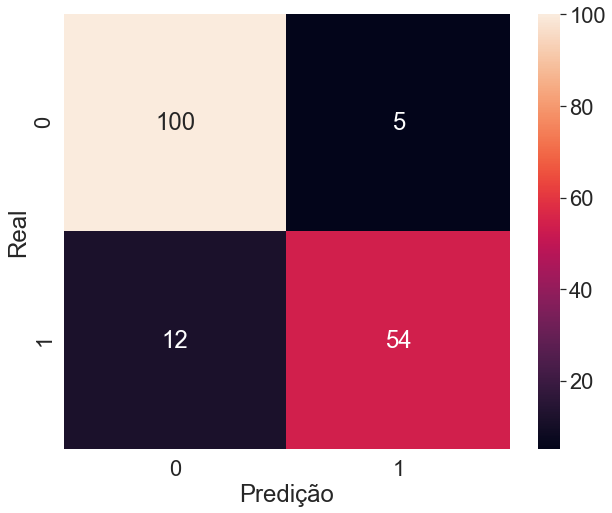

In [191]:
from sklearn.feature_selection import RFE

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(
    valores_exames_v6, diagnostico, test_size=0.3
)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)
selecionador_rfe = RFE(estimator=classificador, n_features_to_select=5, step=1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)
classificador.fit(treino_rfe, treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
plt.figure(figsize=(10, 8))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao, annot=True, fmt="d").set(xlabel="Predição", ylabel="Real")

print(
    "Resultado da classificação %.2f%%"
    % (classificador.score(teste_rfe, teste_y) * 100)
)

Resultado da classificação 94.15%


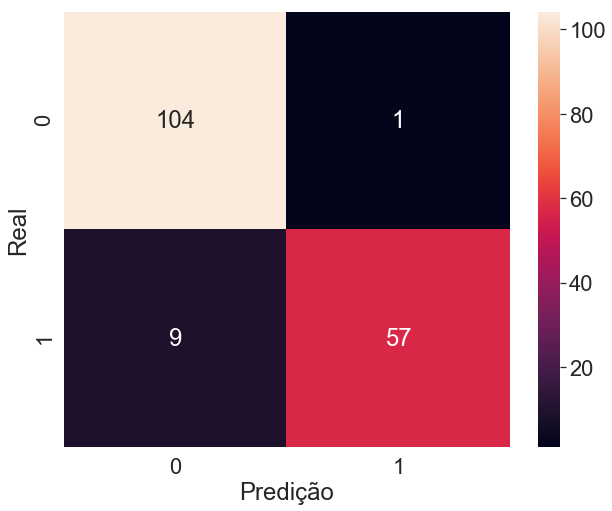

In [155]:
from sklearn.feature_selection import RFECV

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(
    valores_exames_v6, diagnostico, test_size=0.3
)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)
selecionador_rfecv = RFECV(estimator=classificador, cv=5, step=1, scoring="accuracy")
selecionador_rfecv.fit(treino_x, treino_y)
treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)
classificador.fit(treino_rfecv, treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))
plt.figure(figsize=(10, 8))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao, annot=True, fmt="d").set(xlabel="Predição", ylabel="Real")

print(
    "Resultado da classificação %.2f%%"
    % (classificador.score(teste_rfecv, teste_y) * 100)
)

In [158]:
treino_x.columns[selecionador_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_12', 'exame_14', 'exame_15', 'exame_22', 'exame_23',
       'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30', 'exame_31',
       'exame_32'],
      dtype='object')

In [163]:
len(selecionador_rfecv.grid_scores_)

28

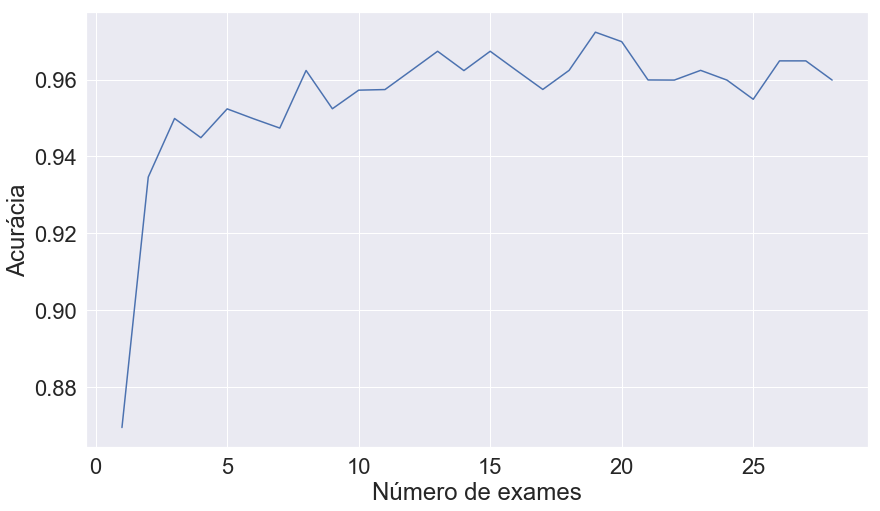

In [167]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.xlabel("Número de exames")
plt.ylabel("Acurácia")
plt.plot(
    range(1, len(selecionador_rfecv.grid_scores_) + 1), selecionador_rfecv.grid_scores_
)
plt.show()

In [173]:
valores_exames_v7 = selecionador_rfe.transform(valores_exames_v6)

In [176]:
valores_exames_v7

array([[0.1471 , 0.2654 ],
       [0.07017, 0.186  ],
       [0.1279 , 0.243  ],
       ...,
       [0.05302, 0.1418 ],
       [0.152  , 0.265  ],
       [0.     , 0.     ]])

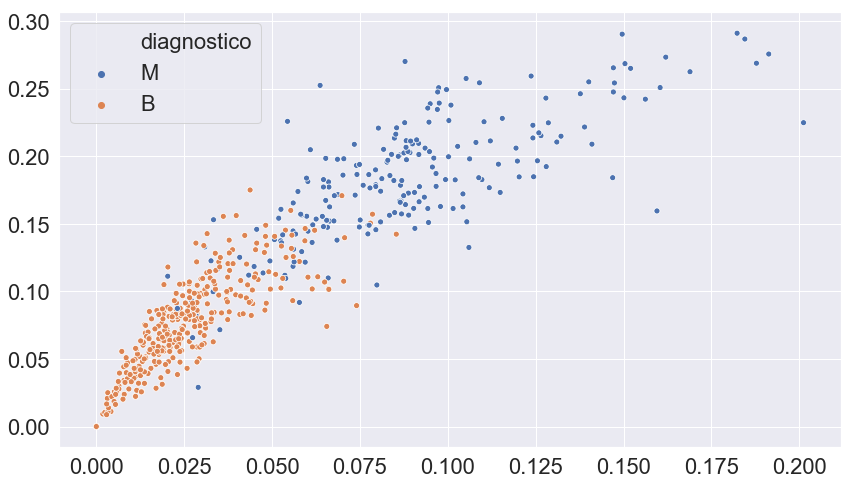

In [177]:
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.scatterplot(x=valores_exames_v7[:, 0], y=valores_exames_v7[:, 1], hue=diagnostico)

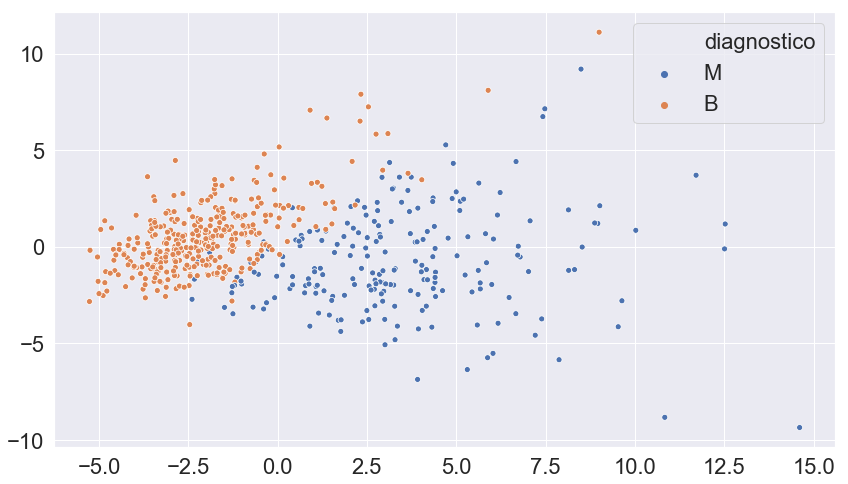

In [185]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
valores_exames_v8 = pca.fit_transform(valores_exames_v5)
plt.figure(figsize=(14, 8))
sns.scatterplot(x=valores_exames_v8[:, 0], y=valores_exames_v8[:, 1], hue=diagnostico)

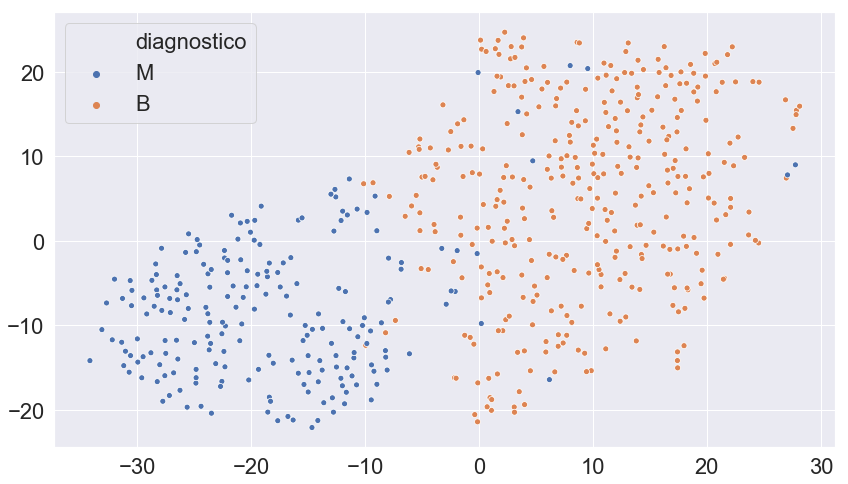

In [190]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
valores_exames_v9 = tsne.fit_transform(valores_exames_v5)
plt.figure(figsize=(14, 8))
sns.scatterplot(x=valores_exames_v9[:, 0], y=valores_exames_v9[:, 1], hue=diagnostico)